In [116]:
# load functions for data analysis
from adapting_fyp_analysis import experimental, visualizeStats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf    
import pandas, os, scipy
import numpy as np
import seaborn as sns

from scipy import stats

In [117]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [118]:
data_path = '/Users/biota/Desktop/sSL/experiment_2/collection/scr_data/'

In [119]:
day_one = experimental(data_path)
day_one.day = 1
day_one.preprocessData()

In [120]:
day_two = experimental(data_path)
day_two.day = 2
day_two.preprocessData()

In [147]:
cb = []; cb_name = []
bc = []; bc_name = []

for i_subject in range(0,len(day_two.subjectNames)): 
    
    subject_number = int(day_two.subjectNames[i_subject][1:3])
    
    condMarkers = np.copy(day_two.transData[i_subject][1])
    neg_ons = day_two.stimuli(condMarkers[:,1])[0]
    pos_ons = day_two.stimuli(condMarkers[:,0])[0]
    
    if pos_ons[0] > neg_ons[0]: 
        bc.append(i_subject)
        bc_name.append(subject_number)
    else: 
        cb.append(i_subject)
        cb_name.append(subject_number)
        
cb = np.array(cb)
bc = np.array(bc)

In [148]:

order = np.zeros(day_two.nSubjects)
order[cb] = 1
order

array([ 0.,  0.,  1.,  0.,  0.])

In [149]:
conditioning_pos_offsets = np.zeros([day_one.nSubjects,len(range(3,12))])
conditioning_neg_offsets = np.zeros([day_one.nSubjects,len(range(3,12))])

day_one.nSeconds = 4.5
conditioning = list(range(3,12))
for iStim in range(0,len(conditioning)):
    conditioning_neg_offsets[:,iStim], conditioning_pos_offsets[:,iStim] = day_one.amplitudeDifference('trans',
                                                                                                       conditioning[iStim],
                                                                                                       'offset');
conditioning_significance_offsets = np.zeros(day_one.nSubjects)
for iSubject in range(0,day_one.nSubjects): 
    conditioning_significance_offsets[iSubject] = scipy.stats.wilcoxon(conditioning_pos_offsets[iSubject,:],
                                                                     conditioning_neg_offsets[iSubject,:])[1];

In [150]:
start_con_onsets = 4
end_con_onsets   = 13
conditioning_pos_onsets = np.zeros([day_one.nSubjects,len(range(start_con_onsets,end_con_onsets))])
conditioning_neg_onsets = np.zeros([day_one.nSubjects,len(range(start_con_onsets,end_con_onsets))])

day_one.nSeconds = 4.5
conditioning = list(range(start_con_onsets,end_con_onsets))

for i_stim in range(0,len(conditioning)):
    conditioning_neg_onsets[:,i_stim], conditioning_pos_onsets[:,i_stim] = day_one.amplitudeDifference('trans',
                                                                           conditioning[i_stim],
                                                                           'onset');
conditioning_significance_onsets = np.zeros(day_one.nSubjects)

for i_subject in range(0,day_one.nSubjects): 
    conditioning_significance_onsets[i_subject] = scipy.stats.wilcoxon(conditioning_pos_onsets[i_subject,:],
                                                                 conditioning_neg_onsets[i_subject,:])[1];

In [152]:

iStim = 0
day_two.nSeconds = 4.5
renewal_minus, renewal_plus = day_two.amplitudeDifference('trans',iStim,'onset');


In [153]:
# s_i = 0
# print(day_two.subjectNames[s_i:])
# s_cb = cb[s_i:]

In [154]:
log_conditioning_pos_onsets = log(1 + conditioning_pos_onsets)
log_conditioning_neg_onsets = log(1 + conditioning_neg_onsets)
log_renewal_plus = log(1 + renewal_plus)
log_renewal_minus = log(1 + renewal_minus)

log_learning = mean(log_conditioning_pos_onsets - log_conditioning_neg_onsets,1)
log_renewal =  log_renewal_plus - log_renewal_minus 

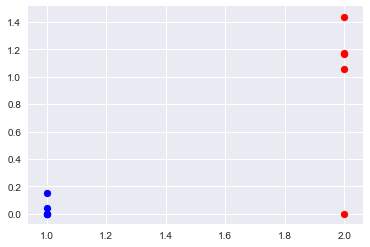

In [156]:
#scatter(order[cb], log_renewal_plus[cb])
scatter(np.ones(len(cb)), log_renewal_minus[order==True], color='blue')
scatter(np.ones(len(cb))+1, log_renewal_plus[order==True], color='red')

tmp_len = len(np.nonzero(order==False)[0])
scatter(np.ones(tmp_len), log_renewal_minus[order==False], color='blue')
scatter(np.ones(tmp_len)+1, log_renewal_plus[order==False], color='red')

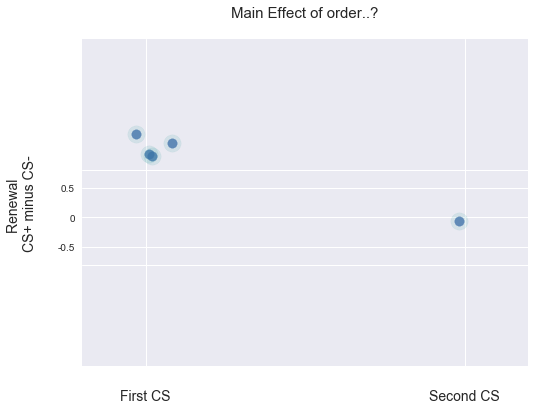

In [157]:

figure(figsize=[8,6])
jitter = np.random.randn(len(order))/20
scatter(order + jitter,log_renewal + jitter, alpha=.8, s=90)
scatter(order + jitter,log_renewal + jitter, color='darkcyan', alpha=.1, s=300)
ylabel('Renewal \nCS+ minus CS-\n', rotation=90, fontsize=14)
yticks([-.8, -.5,0,.5,.8],['', -.5,0,.5,''])
xticks([0, 1],['\nFirst CS','\nSecond CS'], fontsize=14)
xlim(-.2, 1.2)
ylim(-2.5, 3)
title('Main Effect of order..?\n', fontsize=15)


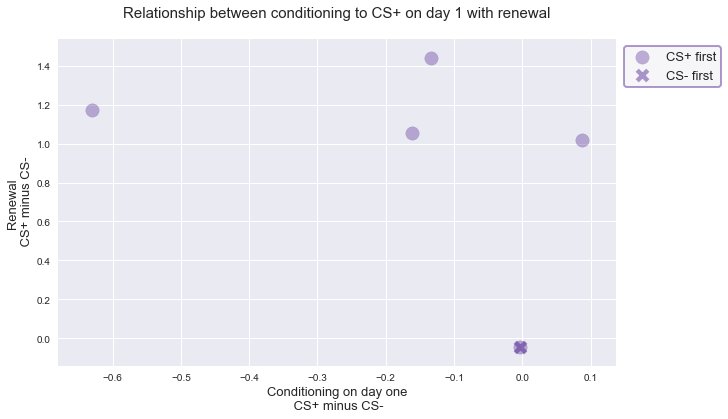

In [159]:
figure(figsize=(10,6))

x_axis = log_learning
y_axis = log_renewal
cb_x_axis = log_learning[order==True]; 
cb_x_axis = cb_x_axis
cb_y_axis = log_renewal[order==True]; 
cb_y_axis = cb_y_axis

scatter(x_axis, y_axis, color='xkcd:indigo',alpha=.3,s=180, label='CS+ first')
scatter(cb_x_axis, cb_y_axis ,marker='x', color='xkcd:indigo',alpha=.4, s=10, linewidth=15, label='CS- first')

# control aesthetics
lgnd = legend(fontsize=13, fancybox=True, frameon=True, bbox_to_anchor=(.20, 1, 1, 0))
lgnd.get_frame().set_edgecolor('xkcd:indigo')
lgnd.get_frame().set_linewidth(2)
lgnd.get_frame().set_alpha(.4)

xlabel('Conditioning on day one\n CS+ minus CS-',fontsize=13)
ylabel('Renewal\n CS+ minus CS-',fontsize=13)
title('Relationship between conditioning to CS+ on day 1 with renewal\n',fontsize=15); 


In [ ]:
conditioning_start = 4
conditioning_end  = 13
conditioning = list(range(conditioning_start, conditioning_end))

CSP = np.zeros([day1.nSubjects,len(conditioning)])
CSM = np.zeros([day1.nSubjects,len(conditioning)])

day1.nSeconds = 5
for iStim in range(0,len(conditioning)):
    CSP[:,iStim], CSM[:,iStim] = day1.amplitudeDifference('trans', conditioning[iStim], 'onset');

# figure this error out
# iStim = 15
# last_plus, last_minus = day1.amplitudeDifference('trans',iStim, 'onset');
# last_CS = last_plus - last_minus

iStim = 0
day2_minus, day2_plus = day2.amplitudeDifference('trans', iStim, 'onset');

# only look at subjects that i've collected
start_subject = 14
included_subjects = day2.subjectNames[start_subject:]

CSP = CSP[start_subject:]
CSM = CSM[start_subject:]

day2_minus = day2_minus[start_subject:]
day2_plus = day2_plus[start_subject:]

cb = cb[start_subject:]
bc = bc[start_subject:]

In [ ]:
x_axis = mean(CSP - CSM,1)
y_axis =  (day2_plus - day2_minus)# - last_CS

slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)

figure(figsize=[12, 6.5])

# plot data 
scatter(x_axis, y_axis, color='xkcd:indigo',alpha=.2, s=150, label='Day 2: CS+ first')
#scatter(x_axis, y_axis, marker='x', color='xkcd:indigo',alpha=.9, s=100, label='Day 2: CS- First')

# plot line fit to data
x_line = np.arange(min(x_axis), max(x_axis), .1)
y_line = slope * x_line + intercept 
plot(x_line, y_line, alpha=.1, linewidth=15, color='xkcd:indigo')

# control aesthetics
lgnd = legend(fontsize=13, fancybox=True, frameon=True, bbox_to_anchor=(.25, 1, 1, 0))
lgnd.get_frame().set_edgecolor('xkcd:indigo')
lgnd.get_frame().set_linewidth(2)
lgnd.get_frame().set_alpha(.4)
xlabel('differential anticipatory response on day one\n (CS+ minus CS-)',fontsize=13)
ylabel('renewal\n CS+ minus CS-',fontsize=13)
title("\nRelationship between 'anticipation' of shock on day one with with renewal \n wop wop: p < %.3f\n"% p_value,fontsize=16); 

for i_subject in range(len(day2_plus)): 
    plt.annotate(i_subject+start_subject, xy=(x_axis[i_subject], y_axis[i_subject]), 
                                 xytext=(-5, -20), textcoords='offset points', alpha=.5, fontsize=11)

In [ ]:
_, p = stats.wilcoxon(y_axis[bc], y_axis[cb])

not_cb = np.nonzero([int(day2.subjectNames[ii][1:3]) not in cb for ii in range(len(cb))])[0]

plt.scatter(np.ones(len(cb[6:])), y_axis[cb][6:], label='CS- first')
plt.scatter(np.ones(len(bc[5:]))+1, y_axis[bc][5:],label='CS+ first')
plt.ylim([-3,3])
plt.legend(loc=4)
plt.title('p < %s'%round(p,3)); 

In [ ]:
x_axis

In [ ]:
included_subjects

In [ ]:
iStim = 3
day1.nSeconds = 4
plus, minus = day1.amplitudeDifference('raw',iStim,'offset');
results = scipy.stats.wilcoxon(plus,minus);
visualizeStats(plus,minus,results, 
               heading='FIRST PRESENTATION OF US ON DAY 1')

In [ ]:
iStim = 0
day1.nSeconds = 4
plus, minus = day1.amplitudeDifference('raw', iStim, 'onset');

results = scipy.stats.wilcoxon(plus,minus);
visualizeStats(plus,minus,results, 
               heading='FIRST PRESENTATION OF STIMULI ON DAY ONE')

In [ ]:
iStim = 0
day2.nSeconds = 4
minus, plus = day2.amplitudeDifference('trans',iStim,'onset');
plus = plus[11:]
minus = minus[11:]

In [ ]:
results = scipy.stats.wilcoxon(plus, minus);
visualizeStats(plus, minus, results, heading='First presentation of Stimuli on day two')

In [ ]:
x_axis = mean(CSP - CSM,1)
y_axis =  (plus - minus) #- last_CS
#y_abs =   abs(y_axis)[11:] # y_abs[abs(x_axis) > .1]
#x_axis = x_axis[11:]       #[abs(x_axis) > .1]
x_axis = x_axis[11:]
y_axis = y_axis[11:]

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis,y_axis)

In [ ]:
figure(figsize=[12, 6.5])

scatter(x_axis, y_axis, color='xkcd:indigo',alpha=.2, s=150, label='Day 2: CS+ first')
#scatter(x_axis[cb], y_abs[cb], marker='x', color='xkcd:indigo',alpha=.9, s=100, label='Day 2: CS- First')

x = np.arange(min(x_axis), max(x_axis), .1)
y = slope*x + intercept 
plot(x, y, alpha=.1, linewidth=15, color='xkcd:indigo')

lgnd = legend(fontsize=10, fancybox=True, frameon=True, loc=2) #bbox_to_anchor=(.2, 1, 1, 0))
lgnd.get_frame().set_edgecolor('xkcd:indigo')
lgnd.get_frame().set_linewidth(2)
lgnd.get_frame().set_alpha(.4)
xlabel('differential anticipatory response on day one\n (CS+ minus CS-)',fontsize=13)
ylabel('renewal\n CS+ minus CS-',fontsize=13)
title("\nRelationship between 'anticipation' of shock on day one with response to first CS day two \n", fontsize=16); 

In [ ]:
# figure(figsize=[12, 6.5])

# scatter(x_axis[11:], y_abs[11:], color='xkcd:indigo',alpha=.2, s=150, label='Day 2: CS+ first')
# #scatter(x_axis[cb], y_abs[cb], marker='x', color='xkcd:indigo',alpha=.9, s=100, label='Day 2: CS- First')

# x = np.arange(min(x_axis[11:]), max(x_axis[11:]), .1)
# y = slope*x + intercept 
# plot(x, y, alpha=.1, linewidth=15, color='xkcd:indigo')

# lgnd = legend(fontsize=10, fancybox=True, frameon=True, loc=2) #bbox_to_anchor=(.2, 1, 1, 0))
# lgnd.get_frame().set_edgecolor('xkcd:indigo')
# lgnd.get_frame().set_linewidth(2)
# lgnd.get_frame().set_alpha(.4)
# xlabel('differential anticipatory response on day one\n (CS+ minus CS-)',fontsize=13)
# ylabel('renewal\n CS+ minus CS-',fontsize=13)
# title("\nRelationship between 'anticipation' of shock on day one with with renewal \n" \
#        "p < %.3f\n"% p_value,fontsize=16); 

In [ ]:
# CREATE A DATA FRAME FOR PHYSIO 

# response to first US
iStim = 3
USplus, USminus = day1.amplitudeDifference('trans',iStim,'offset');
US = USplus - USminus

# last stimulus from extinction
#iStim = 20
#plus_end, minus_end = day1.amplitudeDifference('trans',iStim,'onset');

# first stimulus on day 2
iStim = 0
minus, plus = day2.amplitudeDifference('trans',iStim,'onset');
# renewal on day 2
renewal = (plus - minus)# - (plus_end - minus_end)

# difference across conditioning
difference = mean(CSP - CSM,1) #difference = log(1 + difference)

# take counterbalanced subjects
order = np.zeros(len(plus))
order[cb] = 1 

# create data frame
SCR = pandas.DataFrame({'renewal':renewal,'prediction':difference,'US':US,'order':order})

In [ ]:
formula = 'renewal ~ order + difference'
model = ols(formula, SCR).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

In [ ]:
formula = 'renewal ~ prediction'
model = ols(formula, SCR).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

In [ ]:
formula = 'renewal ~ US + prediction + C(order)'
model = ols(formula, SCR).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

In [ ]:
physio = pandas.DataFrame() 
#physio['firstMinusLast'] = ( plusRen - minusRen ) - (plusEnd - minusEnd)
physio['renewal'] = renewal
physio['prediction'] = mean(log(1+CSP)- log(1+CSM),1)
#physio['resonance'] = resonance
physio['US'] = US

#physioTitleNames = ['firstMinusLast','renewal','prediction','US','resonance','meanSurprise']
physioTitleNames = ['renewal','prediction','first US']

renewalPredictionCorr = physio['renewal'].corr(physio['prediction'])
physio.corr()

In [ ]:
# p_value = .1
# c_subs = find(conResults < p_value)

# # response to first US
# iStim = 3
# USplus, USminus = day1.amplitudeDifference('trans',iStim,'offset');
# US = USplus[c_subs] - USminus[c_subs]

# # last stimulus from extinction
# iStim = 20
# plus_end, minus_end = day1.amplitudeDifference('trans',iStim,'onset');

# # first stimulus on day 2
# iStim = 0
# plus, minus = day2.amplitudeDifference('trans',iStim,'onset');
# # renewal on day 2
# renewal = (plus[c_subs] - minus[c_subs]) - (plus_end[c_subs] - minus_end[c_subs])

# # difference across conditioning
# difference = mean(CSP[c_subs] - CSM[c_subs],1) #difference = log(1 + difference)

# # take counterbalanced subjects
# order = np.zeros(len(plus))
# order[cb] = 1 
# order = order[c_subs]

# # create data frame
# SCR = pandas.DataFrame({'renewal':renewal,'prediction':difference,'US':US,'order':order})

In [ ]:
p_value = .1
c_subs = range(day1.nSubjects)

# response to first US
iStim = 3
USplus, USminus = day1.amplitudeDifference('trans',iStim,'offset');
US = USplus[c_subs] - USminus[c_subs]

# last stimulus from extinction
iStim = 20
plus_end, minus_end = day1.amplitudeDifference('trans',iStim,'onset');

# first stimulus on day 2
iStim = 0
plus, minus = day2.amplitudeDifference('trans',iStim,'onset');
# renewal on day 2
renewal = (plus[c_subs] - minus[c_subs]) - (plus_end[c_subs] - minus_end[c_subs])

# difference across conditioning
difference = mean(CSP[c_subs] - CSM[c_subs],1) #difference = log(1 + difference)

# take counterbalanced subjects
order = np.zeros(len(plus))
order[cb] = 1 
order = order[c_subs]

# create data frame
SCR = pandas.DataFrame({'renewal':renewal,'prediction':difference,'US':US,'order':order})

In [ ]:
# # formula = 'renewal ~ prediction'
# # model = ols(formula, SCR).fit()
# # aov_table = anova_lm(model, typ=2)
# # print(aov_table)

# print ('\n\n')
# formula = 'renewal ~ US + prediction'#+ C(order)'
# model = ols(formula, SCR).fit()
# aov_table = anova_lm(model, typ=2)
# print(aov_table)

In [ ]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches([6,6])
ax = imshow(physio.corr())
ax1.set_xticks(np.array(list(range(0,len(physioTitleNames)))))
ax1.set_xticklabels(physioTitleNames,rotation=90,fontsize=10); 
ax1.set_yticks(np.array(list(range(0,len(physioTitleNames)))))
ax1.set_yticklabels(physioTitleNames,fontsize=10); 
ax.set_cmap('bwr') # 'coolwarm' # 'seismic'
ax.set_clim([-1,1])
ax.set_alpha(1)
title('\ncorrelation between physiological measurements\n corr(renewal,prediction) = %.2f\n'%
      (renewalPredictionCorr),fontsize=15); 
colorbar()

In [ ]:
import behavioral_analysis_functions_fyp as behave

In [ ]:
behavioral_data = '/Users/biota/Desktop/sSL/experiment_2/collection/scr_data/'
self_report, subject_names = behave.generate_data_frame(behavioral_data)

In [ ]:
self_report['expectShock'].values

In [ ]:
behave.correlation_matrix(self_report)

In [ ]:
SCR.index = day2.subjectNames
count = 0
for isubject in range(0, len(SCR)):
    if self_report.index[count] in SCR.index[isubject]: 
        for ikey in self_report.keys():
            SCR.loc[SCR.index[isubject], ikey] =  self_report.loc[self_report.index[count], ikey]
        count = count + 1 
    else: 
        pass

In [ ]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches([10,10])
ax = plt.imshow(SCR.corr())
title_names = list(SCR.corr().keys())
ax1.set_xticks(np.array(list(range(0,len(title_names)))))
ax1.set_xticklabels(title_names,rotation=70);
ax1.set_yticks(np.array(list(range(0,len(title_names)))))
ax1.set_yticklabels(title_names);
ax.set_cmap('bwr') # 'coolwarm' # 'seismic'
ax.set_clim([-1,1])
ax.set_alpha(1)
plt.title('correlation between self report measures\n');
#plt.colorbar()
plt.show()

In [ ]:
formula = 'renewal ~ prediction + correctColor'
model = ols(formula, SCR).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)